In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from model.user import User
from model.topic import Topic
import pandas as pd
from utils import Utils

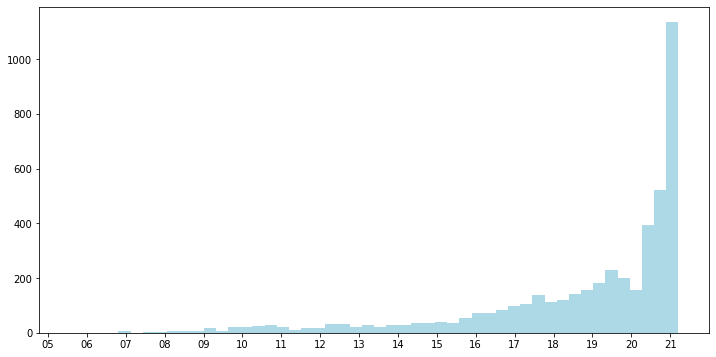

In [36]:
import datetime
start_date = datetime.datetime(2020, 1, 1)
x = datetime.datetime(2021, 12, 30)
#filter(User.created<x).filter(User.created>start_date).
user_list = Utils.get_session().query(User).filter(User.created is not None).all()
dates = [user.created for user in user_list]
# convert the epoch format to matplotlib date format 

# plot it
# fig, ax = plt.subplots(1,1)
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(dates, bins=50, color='lightblue')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y'))
plt.show()

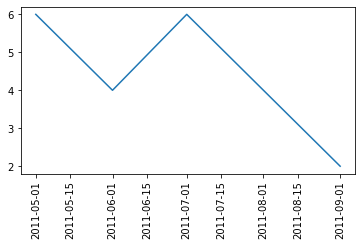

In [2]:
import matplotlib.pyplot as plt

date_time = ["2011-09-01", "2011-08-01", "2011-07-01", "2011-06-01", "2011-05-01"]
date_time = pd.to_datetime(date_time)
temp = [2, 4, 6, 4, 6]

DF = pd.DataFrame()
DF['temp'] = temp
DF = DF.set_index(date_time)

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.3)
plt.xticks(rotation=90)
plt.plot(DF)

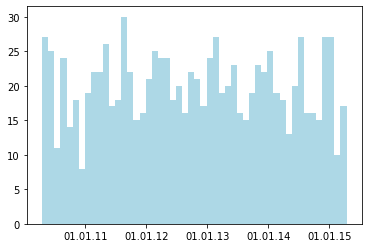

In [11]:
import random
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# generate some random data (approximately over 5 years)
data = [float(random.randint(1271517521, 1429197513)) for _ in range(1000)]

# convert the epoch format to matplotlib date format 
mpl_data = mdates.epoch2num(data)

# plot it
fig, ax = plt.subplots(1,1)
ax.hist(mpl_data, bins=50, color='lightblue')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))
plt.show()

In [12]:
data

[1275516877.0,
 1384321556.0,
 1406105590.0,
 1330608961.0,
 1299513761.0,
 1278192532.0,
 1302415423.0,
 1311503721.0,
 1369093574.0,
 1387161533.0,
 1357412650.0,
 1357640383.0,
 1282631846.0,
 1300920255.0,
 1336451194.0,
 1411357028.0,
 1386540016.0,
 1363666860.0,
 1276095079.0,
 1359438519.0,
 1366859086.0,
 1379363266.0,
 1272471576.0,
 1383746579.0,
 1287870603.0,
 1387654465.0,
 1341157794.0,
 1352245500.0,
 1419530676.0,
 1356052134.0,
 1309305650.0,
 1358470189.0,
 1287226237.0,
 1361348480.0,
 1322674160.0,
 1408946459.0,
 1336157000.0,
 1342335512.0,
 1360441536.0,
 1368978650.0,
 1395872937.0,
 1294557875.0,
 1306487189.0,
 1393461644.0,
 1406618147.0,
 1315429673.0,
 1427349783.0,
 1283048031.0,
 1411582447.0,
 1347326339.0,
 1360003675.0,
 1321152627.0,
 1381679862.0,
 1330478274.0,
 1276872461.0,
 1348184657.0,
 1332327102.0,
 1360551106.0,
 1388840043.0,
 1327542702.0,
 1313793365.0,
 1291449891.0,
 1385971063.0,
 1313448713.0,
 1420955719.0,
 1364749488.0,
 132854642